In [2]:
# Import necessary libraries
import keras
from keras.datasets import mnist
from keras import backend as k
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import adam, Adadelta

Using TensorFlow backend.


In [3]:
# Defined model parameters
batch_size = 128
num_classes = 10
epoch = 10
n_row, n_col = 28, 28
# Load mnist data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# For "tensorflow "or "cntk" backends, it should be "channels_last".
# For "theano", it should be "channels_first". 
# Both TensorFlow and Theano expects a four dimensional tensor as input.
# tensorflow expects tensor with shape(samples, rows, cols, channels)
# theano expects tensor with shape(samples, channels, rows, cols).
# We can also set this in each conv layer using data_format = "channels_first" or "channels_last"
if k.image_data_format() == "channels_first":
    x_train = x_train.reshape(x_train.shape[0], 1, n_row, n_col)
    x_test = x_test.reshape(x_test.shape[0], 1, n_row, n_col)
    input_shape = (1, n_row, n_col)
else:
    x_train = x_train.reshape(x_train.shape[0], n_row, n_col, 1)
    x_test = x_test.reshape(x_test.shape[0], n_row, n_col, 1)
    input_shape = (n_row, n_col, 1)

In [5]:
# Normalization
x_train = x_train/255
x_test = x_test/255
print("X train shape", x_train.shape)
print("X test shape", x_test.shape)

X train shape (60000, 28, 28, 1)
X test shape (10000, 28, 28, 1)


In [6]:
# Convert each class label into 10-D vector So,that whereever we have class belongs to certain image it will be 1 otherwise 0.
# Basically doing one hot encoding 
print("Before conversion", y_train[0])
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print("After conversion", y_train[0])

Before conversion 5
After conversion [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss") 
    plt.legend()
    plt.grid()
    fig.canvas.draw()

# 4 Convolutional layer with kernel_size = (7 * 7)

In [30]:
# model 
model = Sequential()
model.add(Conv2D(8, kernel_size = (7, 7), activation = "relu", input_shape = input_shape))
model.add(Conv2D(8, kernel_size = (7, 7), activation = "relu"))
model.add(Dropout(0.5))

model.add(Conv2D(16, kernel_size = (7, 7), activation = "relu"))
model.add(Conv2D(16, kernel_size = (7, 7), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(198, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))
model.compile(loss = categorical_crossentropy, metrics = ["accuracy"], optimizer = "adam")
history = model.fit(x_train, y_train, batch_size, epochs = epoch, verbose = 1, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.4781 - acc: 0.8425 - val_loss: 0.0942 - val_acc: 0.9707
Epoch 2/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.1393 - acc: 0.9584 - val_loss: 0.0712 - val_acc: 0.9783
Epoch 3/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.1019 - acc: 0.9706 - val_loss: 0.0518 - val_acc: 0.9847
Epoch 4/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0896 - acc: 0.9739 - val_loss: 0.0466 - val_acc: 0.9851
Epoch 5/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0730 - acc: 0.9783 - val_loss: 0.0424 - val_acc: 0.9866
Epoch 6/10
60000/60000 [==============================] - 91s 2ms/step - loss: 0.0672 - acc: 0.9800 - val_loss: 0.0342 - val_acc: 0.9897
Epoch 7/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0607 - acc: 0.9820 - val_loss: 0.0404 - val_acc

Test score: 0.03266936225374811
Test accuracy: 0.989


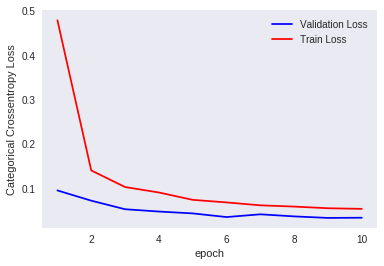

In [31]:
score757 = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score757[0]) 
print('Test accuracy:', score757[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Observations** <br>
1. We have used 4 convolutional layer with couple of dropout and maxpooling layer and found that train and validation loss is closed to each other and and hence model don't overfit. 

# 5 Convolutional layer + relu + adam with kernel_size = (3, 5 and 7)

In [9]:
# model 
model = Sequential()
model.add(Conv2D(16, kernel_size = (3, 3), activation = "relu", input_shape = input_shape))
model.add(Conv2D(16, kernel_size = (3, 3), activation = "relu"))
model.add(Conv2D(32, kernel_size = (5, 5), activation = "relu"))
model.add(Conv2D(64, kernel_size = (7, 7), activation = "relu"))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size = (7, 7), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation = "softmax"))

model.compile(loss = categorical_crossentropy, metrics = ["accuracy"], optimizer = "adam")
history = model.fit(x_train, y_train, batch_size, epochs = epoch, verbose = 1, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 513s 9ms/step - loss: 0.2337 - acc: 0.9268 - val_loss: 0.0401 - val_acc: 0.9884
Epoch 2/10
60000/60000 [==============================] - 521s 9ms/step - loss: 0.0655 - acc: 0.9808 - val_loss: 0.0278 - val_acc: 0.9928
Epoch 3/10
60000/60000 [==============================] - 525s 9ms/step - loss: 0.0506 - acc: 0.9849 - val_loss: 0.0222 - val_acc: 0.9933
Epoch 4/10
60000/60000 [==============================] - 534s 9ms/step - loss: 0.0427 - acc: 0.9879 - val_loss: 0.0261 - val_acc: 0.9920
Epoch 5/10
60000/60000 [==============================] - 523s 9ms/step - loss: 0.0378 - acc: 0.9888 - val_loss: 0.0222 - val_acc: 0.9931
Epoch 6/10
60000/60000 [==============================] - 520s 9ms/step - loss: 0.0360 - acc: 0.9892 - val_loss: 0.0257 - val_acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 530s 9ms/step - loss: 0.0304 - acc: 0.9911 - val_loss: 0.0202 - 

Test score: 0.019235954049397697
Test accuracy: 0.9941


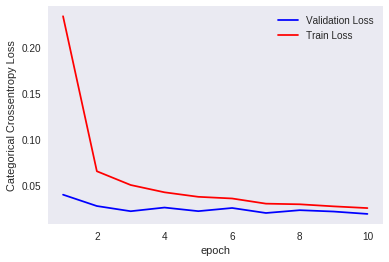

In [10]:
score751 = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score751[0]) 
print('Test accuracy:', score751[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1, epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Observations**<br>
1. Accuracy is slightly high when we used different kernel size in ascending order and also we can not build 6 or 7 layer cnn with  7*7 kernel size on this data because the input shape after applying after 4th layer, the shape we will obtain, is lower.

**Conclusion**

1. We have used 7 * 7 kernel size with 4 layer and also used different kernel size in ascending order and got 98% , 99% accuracy.
2. We observe that incresing kernel_size may increse the performence and designing the network is like hit and trail. If the design model works good then choose it otherwise think for another one.

In [35]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["MODEL", "ACCURACY"]
x.add_row(["CNN with 5 layers, kernel_size = (7*7)", score751[1]])
x.add_row(["CNN with 4 layers, kernel_size = (7*7)", score757[1]])
print(x)

+----------------------------------------+----------+
|                 MODEL                  | ACCURACY |
+----------------------------------------+----------+
| CNN with 5 layers, kernel_size = (7*7) |  0.9941  |
| CNN with 7 layers, kernel_size = (7*7) |  0.989   |
+----------------------------------------+----------+
